In [20]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
owid = pd.read_csv(r"../data/owid-covid-data.csv")
owid['date_str'] = [''.join(item.split('-')) for item in owid['date']]
owid['countrycode_date_str'] = [';'.join(item) for item in owid[['iso_code', 'date_str']].values]
assert owid.shape[0] == len(owid['countrycode_date_str'].unique())
owid = owid.set_index('countrycode_date_str')
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_str
countrycode_date_str,,,,,,,,,,,,,,,,,,,,,
AFG;20200224,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,20200224
AFG;20200225,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,20200225
AFG;20200226,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,20200226
AFG;20200227,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,20200227
AFG;20200228,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,20200228


In [2]:
oxcgrt_latest = pd.read_csv('../data/OxCGRT_latest.csv', index_col='CountryName')
oxcgrt_latest['countrycode_date_str'] = [';'.join([str(ele) for ele in item]) for item in oxcgrt_latest[['CountryCode', 'Date']].values]
print(oxcgrt_latest.shape, len(oxcgrt_latest['countrycode_date_str'].unique()))

groupedby_date_countrycode = oxcgrt_latest.groupby(['countrycode_date_str']).agg({'Date':'count',
                                                                                  'RegionName':lambda x:list(set(x)),
                                                                                  'CountryCode':lambda x:list(set(x))[0]})
big_countries = set(groupedby_date_countrycode['CountryCode'][groupedby_date_countrycode['Date']>1].value_counts().index.values)

# combine except those big countries
print('Big countries with more than one regions are:', big_countries)
isBigCountry = lambda x:True if x in big_countries else False
oxcgrt_latest['isBig'] = [isBigCountry(code) for code in oxcgrt_latest['CountryCode']]
print(oxcgrt_latest['isBig'].value_counts())

smallcountries_oxcgrt = oxcgrt_latest[oxcgrt_latest['isBig']==False].copy()
bigcountries_oxcgrt = oxcgrt_latest[oxcgrt_latest['isBig']==False].copy()

assert smallcountries_oxcgrt.shape[0] == len(smallcountries_oxcgrt['countrycode_date_str'].unique())

owid['isBig'] = [isBigCountry(code) for code in owid['iso_code']]
smallcountries_owid = owid[owid['isBig']==False]
bigcountries_owid = owid[owid['isBig']]

/home/shuang/miniconda3/envs/hackathon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(135161, 51) 89466
Big countries with more than one regions are: {'CAN', 'GBR', 'BRA', 'USA'}
False    87542
True     47619
Name: isBig, dtype: int64


In [3]:
oxcgrt_latest.columns

Index(['CountryCode', 'RegionName', 'RegionCode', 'Jurisdiction', 'Date',
       'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag',
       'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings',
       'C4_Flag', 'C5_Close public transport', 'C5_Flag',
       'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',


In [5]:
# combine those small countries
combined_smallcountries = pd.concat([smallcountries_owid, 
                                     smallcountries_oxcgrt.set_index('countrycode_date_str')], axis=1, join='inner')
print(combined_smallcountries.shape)

(70938, 112)


In [6]:
averaged_number_columns = [item for item in smallcountries_owid.columns if '_per_' in item]
notaveraged_columns = [item.split('_per_')[0] for item in averaged_number_columns]
other_columns = [item for item in smallcountries_owid.columns if item not in notaveraged_columns and item not in averaged_number_columns]

# other_columns
cols_to_correlate = [item for item in averaged_number_columns + other_columns if item not in 
                     ['iso_code', 'continent', 'location', 'date', 'isBig', 'date_str']]
cols_to_correlate

['total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions_per_million',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'gdp_per_capita',
 'hospital_beds_per_thousand',
 'reproduction_rate',
 'positive_rate',
 'tests_units',
 'new_vaccinations',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'life_expectancy',
 'human_development_index']

In [7]:
# only europe
europe_owid = combined_smallcountries[combined_smallcountries['continent']=='Europe']

# a country with low happiness
country_basic_columns = ['iso_code', 'gdp_per_capita', 'hospital_beds_per_thousand',
           'population_density', 'median_age',
           'aged_65_older', 'aged_70_older', 'extreme_poverty',
           'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']


country_basic_info = europe_owid[country_basic_columns].drop_duplicates(subset=['iso_code'])
country_basic_info['extreme_poverty'] = country_basic_info['extreme_poverty'].fillna(0)
print(country_basic_info.shape,combined_smallcountries.shape)
country_basic_info.head()

(42, 12) (70938, 112)


,iso_code,gdp_per_capita,hospital_beds_per_thousand,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
countrycode_date_str,,,,,,,,,,,,
ALB;20200225,ALB,11803.431,2.89,104.871,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2
AND;20200302,AND,NaN,NaN,163.755,NaN,NaN,NaN,0.0,109.135,7.97,29.0,37.8
AUT;20200225,AUT,45436.686,7.37,106.749,44.4,19.202,13.748,0.7,145.183,6.35,28.4,30.9
BLR;20200228,BLR,17167.967,11.00,46.858,40.3,14.799,9.788,0.0,443.129,5.18,10.5,46.1
BEL;20200204,BEL,42658.576,5.64,375.564,41.8,18.571,12.849,0.2,114.898,4.29,25.1,31.4


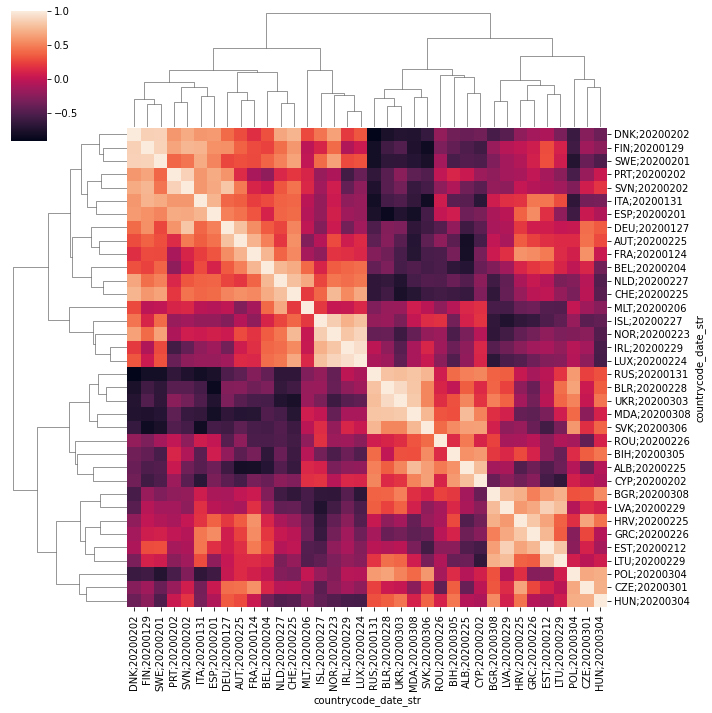

In [8]:
numerical_cols = country_basic_info.dtypes[country_basic_info.dtypes!='object'].index.values
from sklearn.preprocessing import StandardScaler
nonan_countries = country_basic_info[numerical_cols].dropna(axis=0)
normalized_df = pd.DataFrame(StandardScaler().fit_transform(nonan_countries),
                             index=nonan_countries.index,
                             columns=nonan_countries.columns)
sns.clustermap(normalized_df.T.corr())

1. DNK, FIN, SWE
2. RUS, BLR, UKR, MDA

In [17]:
# now time to see the policy data
non_epide_cols = [item for item in europe_owid.columns if item not in country_basic_columns] + ['iso_code']
selected_countries = {'DNK', 'FIN', 'SWE', 'RUS', 'BLR', 'UKR', 'MDA'}
is_selected_country = lambda x:True if x in selected_countries else False
europe_owid['is_selected_country'] = [is_selected_country(countrycode) for countrycode in europe_owid['iso_code']]
selected_owid = europe_owid[europe_owid['is_selected_country']]
print(selected_owid.shape)
selected_owid[non_epide_cols].head()

(3052, 113)


<ipython-input-17-0e52bdc87fe7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_owid['is_selected_country'] = [is_selected_country(countrycode) for countrycode in europe_owid['iso_code']]


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,isBig,isBig,is_selected_country,iso_code
countrycode_date_str,,,,,,,,,,,,,,,,,,,,,
BLR;20200228,Europe,Belarus,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,BLR
BLR;20200229,Europe,Belarus,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,BLR
BLR;20200301,Europe,Belarus,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,BLR
BLR;20200302,Europe,Belarus,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,BLR
BLR;20200303,Europe,Belarus,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,0.106,...,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True,BLR


In [27]:
non_epide_cols

['continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred

In [30]:
selected_owid[['C1_School closing', 'C1_Flag']][~selected_owid['C1_Flag'].isnull()]

,C1_School closing,C1_Flag
countrycode_date_str,,
BLR;20200404,2.0,1.0
BLR;20200405,2.0,1.0
BLR;20200406,2.0,1.0
BLR;20200407,2.0,1.0
BLR;20200408,2.0,1.0
...,...,...
UKR;20210420,3.0,0.0
UKR;20210421,3.0,0.0
UKR;20210422,3.0,0.0


In [44]:
policy_cols = ['C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'E1_Income support',
 'E2_Debt/contract relief',
 'H1_Public information campaigns',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H6_Facial Coverings',
 'H7_Vaccination policy',
 'H8_Protection of elderly people']
#  'E3_Fiscal measures','E4_International support', 'H4_Emergency investment in healthcare','H5_Investment in vaccines',

In [ ]:
selected_countries = {'DNK', 'FIN', 'SWE', 'RUS', 'BLR', 'UKR', 'MDA'}

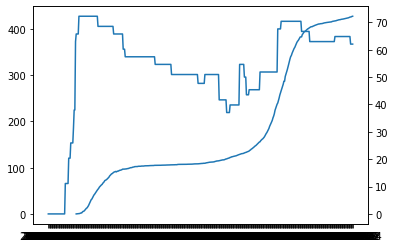

In [60]:
test_country = 'DNK'


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['total_deaths_per_million'][selected_owid['iso_code']==test_country])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['StringencyIndex'][selected_owid['iso_code']==test_country])

_ = plt.xticks(rotation=90)

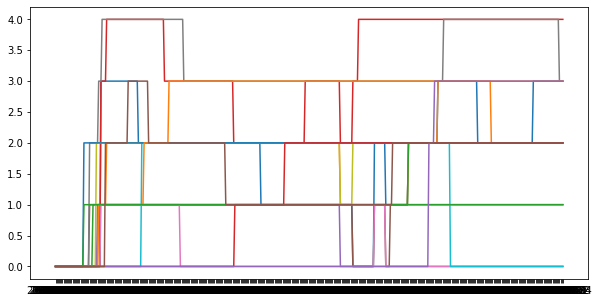

In [57]:
plt.figure(figsize=(10, 5))
for policy in policy_cols:
    plt.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
             selected_owid[policy][selected_owid['iso_code']==test_country])

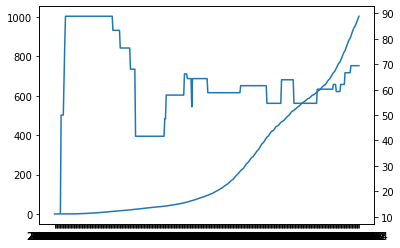

In [81]:
test_country = 'UKR'


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['total_deaths_per_million'][selected_owid['iso_code']==test_country])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['StringencyIndex'][selected_owid['iso_code']==test_country])

_ = plt.xticks(rotation=90)

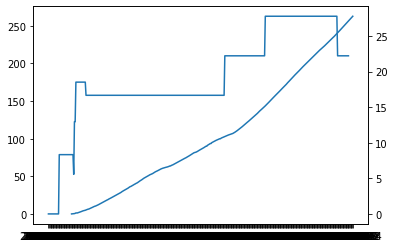

In [87]:
test_country = 'BLR'


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['total_deaths_per_million'][selected_owid['iso_code']==test_country])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
         selected_owid['StringencyIndex'][selected_owid['iso_code']==test_country])

_ = plt.xticks(rotation=90)

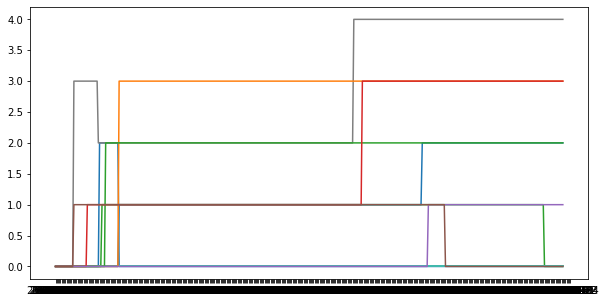

In [88]:
plt.figure(figsize=(10, 5))
for policy in policy_cols:
    plt.plot(selected_owid['date'][selected_owid['iso_code']==test_country],
             selected_owid[policy][selected_owid['iso_code']==test_country])

In [102]:
# when total_deaths_per_million is above 100
countries = ['DNK', 'FIN', 'SWE', 'RUS', 'BLR', 'UKR', 'MDA']
scandi = ['DNK', 'FIN', 'SWE']
east = ['RUS', 'BLR', 'UKR', 'MDA']

stringency_indices = []
for country in countries:
    sub = selected_owid[(selected_owid['iso_code']==country) & 
                                            (selected_owid['total_deaths_per_million']<=100) & 
                                            (selected_owid['total_deaths_per_million']>=10)]
    stringency_indices.append([sub['StringencyIndex'].mean(),
                               sub['StringencyLegacyIndex'].sum(),
                              sub['ContainmentHealthIndex'].mean(),
                               sub['GovernmentResponseIndex'].mean(),
                              sub['EconomicSupportIndex'].sum(),])
    
res_df = pd.DataFrame(index = countries, data=stringency_indices,
                    columns = ['StringencyIndex', 'StringencyLegacyIndex', 'ContainmentHealthIndex',
                               'GovernmentResponseIndex', 'EconomicSupportIndex'])
res_df

,StringencyIndex,StringencyLegacyIndex,ContainmentHealthIndex,GovernmentResponseIndex,EconomicSupportIndex
DNK,67,5k,57,59,5k
FIN,42,14k,41,45,18k
SWE,59,1k,50,49,788
RUS,71,7k,65,65,6k
BLR,17,5k,29,26,0
UKR,61,10k,61,58,5k
MDA,83,5k,72,68,2k


In [100]:
pd.set_eng_float_format(accuracy=0, use_eng_prefix=True)
res_df

,StringencyIndex,StringencyLegacyIndex,ContainmentHealthIndex,GovernmentResponseIndex,EconomicSupportIndex
DNK,67,82,57,59,72
FIN,42,55,41,45,70
SWE,59,71,50,49,38
RUS,71,74,65,65,62
BLR,17,26,29,26,0
UKR,61,68,61,58,38
MDA,83,88,72,68,38


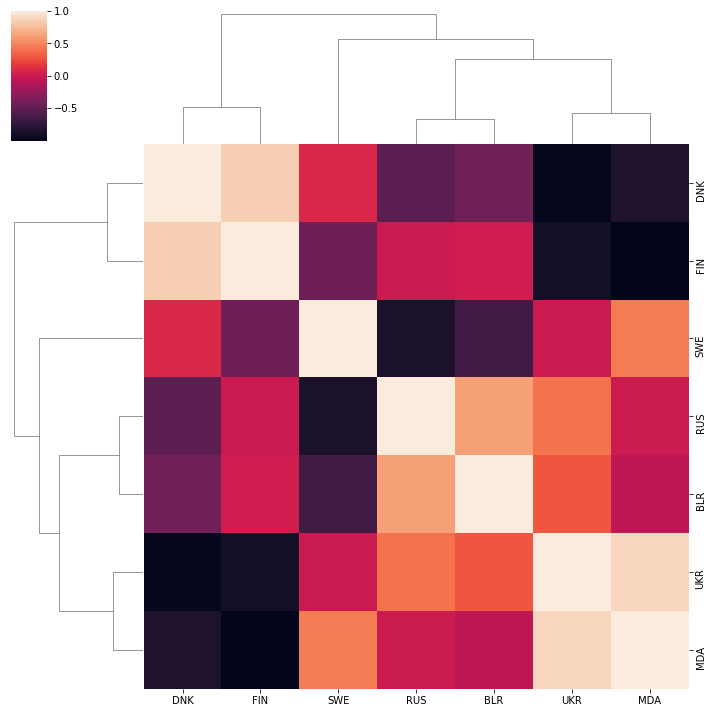

In [99]:
normalized_df = pd.DataFrame(StandardScaler().fit_transform(res_df),
                             index=res_df.index,
                             columns=res_df.columns)
sns.clustermap(normalized_df.T.corr())
# sns.clustermap(StandardScaler().fit_transform(res_df.T.corr()))

In [ ]:
# for all european countries


In [ ]:
# how long did it take for each country to reach total_deaths_per_million 100 